### Assignment 1. Given a graph with a edge list: (0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)
    
Questions:

- Caculate the Node Features: Node Degree,Eigenvector centrality, Betweenness centrality, and Closeness centrality

In [2]:
import itertools
import random
import time
from collections import defaultdict
from typing import Callable, Dict, List, Optional, Tuple, Union

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [3]:
edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (5, 6), (5, 7)]
G = nx.Graph(edge_list)


In [4]:
def features_example(
    feature_extraction_fun: Callable[[nx.Graph], Dict[Union[str, Tuple[str, str]], Union[int, float]]],
    fig_size: Tuple[int, int] = (6, 3),
    node_color: str = "tab:orange",
    node_size: int = 1000,
    width: int = 2,
    seed: Optional[int] = None,) -> None:
    
    
    
    name = feature_extraction_fun.__name__.replace("_", " ").capitalize()
    features = feature_extraction_fun(G)
    pos = nx.spring_layout(G, seed=seed)

    plt.figure(figsize=fig_size)
    nx.draw(G, pos=pos, node_color=node_color, node_size=node_size, width=width, with_labels=True)
    plt.show()

    print(f"\n{name} values:")
    for key, value in sorted(features.items(), key=lambda item: item[0]):
        print(f"- {key}: {value:.2f}")

In [5]:
def node_degree(G: nx.Graph) -> Dict[str, int]:
    return dict(G.degree)

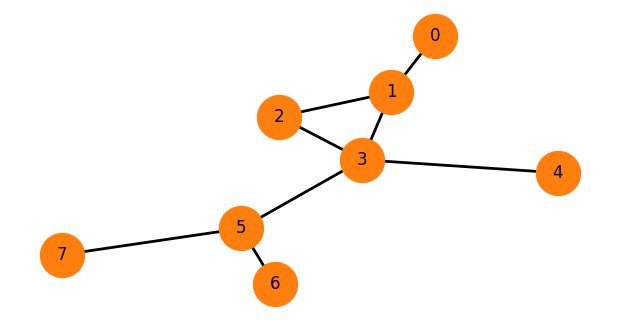


Node degree values:
- 0: 1.00
- 1: 3.00
- 2: 2.00
- 3: 4.00
- 4: 1.00
- 5: 3.00
- 6: 1.00
- 7: 1.00


In [6]:
features_example(node_degree, seed=42)

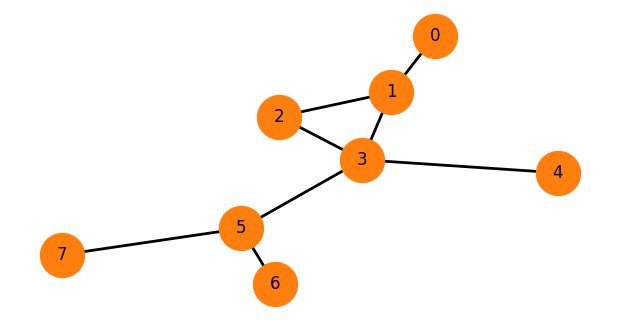


Eigenvector centrality values:
- 0: 0.19
- 1: 0.48
- 2: 0.42
- 3: 0.59
- 4: 0.23
- 5: 0.34
- 6: 0.14
- 7: 0.14


In [7]:
features_example(nx.eigenvector_centrality, seed=42)

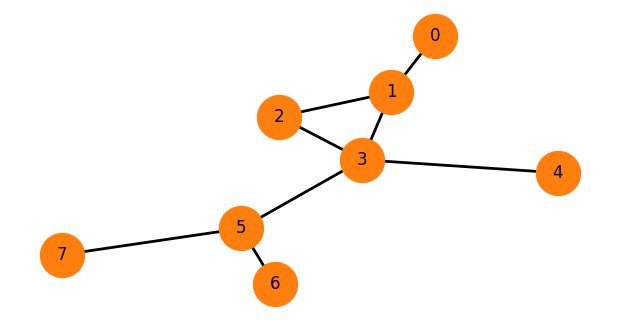


Betweenness centrality values:
- 0: 0.00
- 1: 0.29
- 2: 0.00
- 3: 0.71
- 4: 0.00
- 5: 0.52
- 6: 0.00
- 7: 0.00


In [8]:
features_example(nx.betweenness_centrality, seed=42)

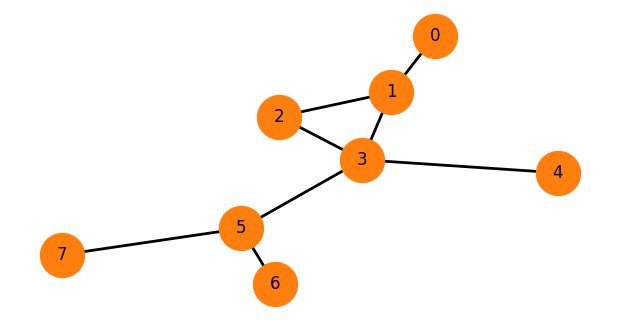


Closeness centrality values:
- 0: 0.37
- 1: 0.54
- 2: 0.50
- 3: 0.70
- 4: 0.44
- 5: 0.58
- 6: 0.39
- 7: 0.39


In [9]:
features_example(nx.closeness_centrality, seed=42)

#### Assignment 2. Given a graph with a edge list: (1, 2), (1, 5), (2, 3), (4, 3), (4,5), (2,4)
    
Questions: Caclulate all the features for edges based on:
    
- Shortest-path distance between two nodes
    
- Common neighbors
  

In [11]:
edge_list = [(1, 2), (1, 5), (2, 3), (4, 3), (4,5), (2,4)]
G = nx.Graph(edge_list)

In [12]:
def shortest_path_length(G: nx.Graph) -> Dict[Tuple[str, str], int]:
    out = {}
    for node_pair in itertools.combinations(G.nodes, 2):
        out[node_pair] = nx.shortest_path_length(G, *node_pair)

    return out

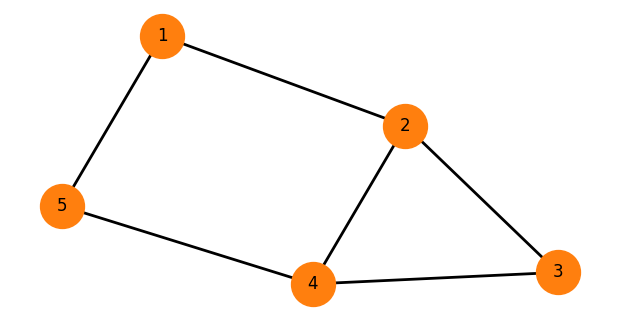


Shortest path length values:
- (1, 2): 1.00
- (1, 3): 2.00
- (1, 4): 2.00
- (1, 5): 1.00
- (2, 3): 1.00
- (2, 4): 1.00
- (2, 5): 2.00
- (3, 4): 1.00
- (5, 3): 2.00
- (5, 4): 1.00


In [13]:
features_example(shortest_path_length, seed=42)

In [14]:
def num_common_neighbors(G: nx.Graph) -> Dict[Tuple[str, str], int]:
    return {edge: len(list((nx.common_neighbors(G, *edge)))) for edge in itertools.combinations(G.nodes, 2)}

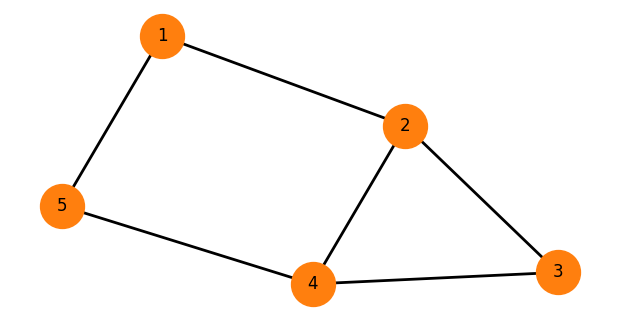


Num common neighbors values:
- (1, 2): 0.00
- (1, 3): 1.00
- (1, 4): 2.00
- (1, 5): 0.00
- (2, 3): 1.00
- (2, 4): 1.00
- (2, 5): 2.00
- (3, 4): 1.00
- (5, 3): 1.00
- (5, 4): 0.00


In [15]:
features_example(num_common_neighbors, seed=42)